_Lambda School Data Science_
# Choose appropriate visualizations

Objectives
- fix misleading visualizations
- use Seaborn to visualize distributions and relationships with continuous and discrete variables

Links
- [How to Spot Visualization Lies](https://flowingdata.com/2017/02/09/how-to-spot-visualization-lies/)
- [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary)
- [Choosing a Python Visualization Tool flowchart](http://pbpython.com/python-vis-flowchart.html)
- [Searborn example gallery](http://seaborn.pydata.org/examples/index.html) & [tutorial](http://seaborn.pydata.org/tutorial.html)


# Upgrade Seaborn

Make sure you have at least version 0.9.0.

On Colab, go to **Restart runtime** after you run the `pip` command.

In [ ]:
!pip install --upgrade seaborn

In [5]:
import seaborn as sns
sns.__version__

'0.9.0'

# Fix misleading visualizations

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-3-Data-Storytelling/master/module2-choose-appropriate-visualizations/misleading.py
    
import misleading

--2019-04-02 11:41:11--  https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-3-Data-Storytelling/master/module2-choose-appropriate-visualizations/misleading.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.204.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.204.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1258 (1.2K) [text/plain]
Saving to: ‘misleading.py.3’

misleading.py.3     100%[===================>]   1.23K  --.-KB/s    in 0s      

2019-04-02 11:41:11 (39.6 MB/s) - ‘misleading.py.3’ saved [1258/1258]



In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import misleading


### Fix misleading plot #1

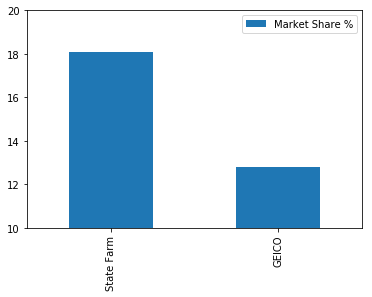

In [4]:
misleading.plot1();

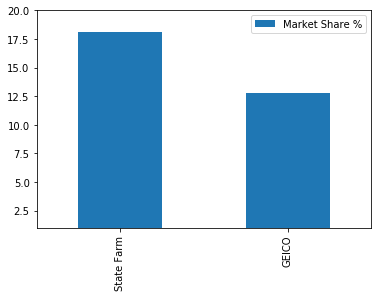

In [12]:
insurance = pd.DataFrame(
            index = ['State Farm', 'GEICO'],
            data = {'Market Share %': [18.07, 12.79]})
insurance.plot.bar(ylim=(1,20))

### Fix misleading plot #2

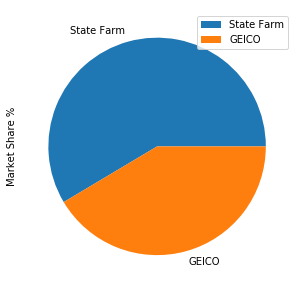

In [5]:
misleading.plot2();

In [13]:
other = pd.DataFrame(
        index=['Other'],
        data = {'Market Share %': [100 - 18.07 - 12.79]})
insurance = insurance.append(other)
insurance

,Market Share %
State Farm,18.07
GEICO,12.79
Other,69.14


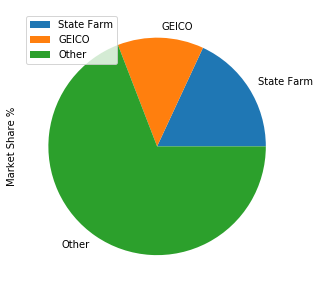

In [15]:
insurance.plot.pie('Market Share %', figsize=(5,5))

## Fix misleading plot #3

_If you're on Jupyter (not Colab) then uncomment and run this cell below:_

In [16]:
import altair as alt
#alt.renderers.enable('notebook')

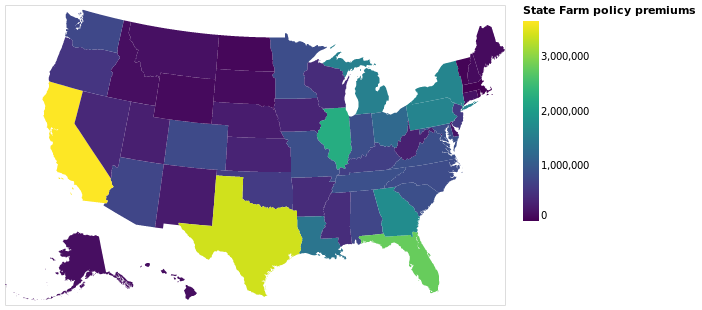

In [17]:
misleading.plot3()

In [18]:
url = 'https://raw.githubusercontent.com/LambdaSchool/DS-Sprint-02-Storytelling-With-Data/master/module2-choose-appropriate-visualizations/direct_written_premium_by_state_by_group_private_passenger_auto.csv'
df = pd.read_csv(url)

In [19]:
df.rename(columns={'STATE FARM GRP': 'State Farm policy premiums'}, inplace=True)
df.head()

,state,id,State Farm policy premiums,BERKSHIRE HATHAWAY GRP,STATE TOTAL
0,Alabama,1,768213,282947,3025561
1,Alaska,2,128613,81366,454623
2,Arizona,4,760003,604049,4373055
3,Arkansas,5,454931,96908,1777917
4,California,6,3655463,2091720,25255501


In [21]:
(df['State Farm policy premiums'] + df['BERKSHIRE HATHAWAY GRP'] == df['STATE TOTAL']).head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [22]:
df['State Farm market share %'] = df['State Farm policy premiums'] / df['STATE TOTAL']
df.head()

,state,id,State Farm policy premiums,BERKSHIRE HATHAWAY GRP,STATE TOTAL,State Farm market share %
0,Alabama,1,768213,282947,3025561,0.253908
1,Alaska,2,128613,81366,454623,0.282900
2,Arizona,4,760003,604049,4373055,0.173792
3,Arkansas,5,454931,96908,1777917,0.255879
4,California,6,3655463,2091720,25255501,0.144739


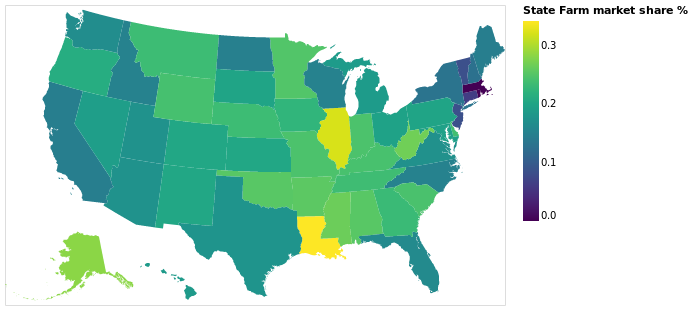

In [23]:
import altair as alt
from vega_datasets import data

states = alt.topo_feature(data.us_10m.url, 'states')
variable = 'State Farm market share %'

alt.Chart(states).mark_geoshape().encode(
    alt.Color(variable, type='quantitative')
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(df, 'id', [variable])
).properties(
    width=500,
    height=300
).project(
    type='albersUsa'
)

# Use Seaborn to visualize distributions and relationships with continuous and discrete variables

## 1. Anscombe dataset

### Load dataset

In [24]:
df = sns.load_dataset('anscombe')

### See the data's shape

In [25]:
df.shape

(44, 3)

### See the data

In [26]:
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


### [Group by](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) `'dataset'`

In [28]:
groups = df.groupby('dataset')

### [Describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) the groups

In [29]:
groups.describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

### Get the [count](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html), for each column in each group

In [30]:
groups.count()

,x,y
dataset,,
I,11,11
II,11,11
III,11,11
IV,11,11


### Get the [mean](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html) ...

In [31]:
groups.mean()

,x,y
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909


### Get the [standard deviation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.std.html) ...

In [32]:
groups.std()

,x,y
dataset,,
I,3.316625,2.031568
II,3.316625,2.031657
III,3.316625,2.030424
IV,3.316625,2.030579


### Get the [correlation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) ...

In [33]:
groups.corr()

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000

### Use pandas to [plot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) the groups, as scatter plots

dataset
I      AxesSubplot(0.125,0.125;0.775x0.755)
II     AxesSubplot(0.125,0.125;0.775x0.755)
III    AxesSubplot(0.125,0.125;0.775x0.755)
IV     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

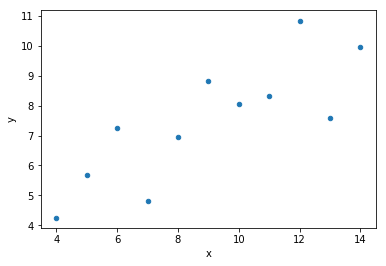

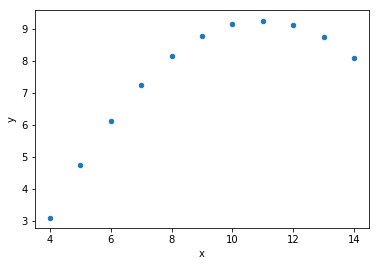

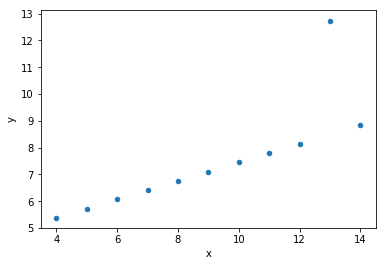

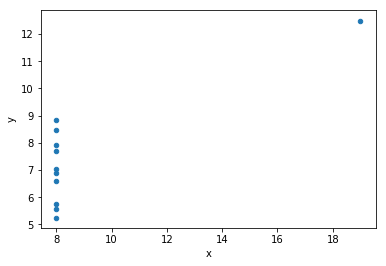

In [34]:
groups.plot('x', 'y', kind = 'scatter')

### Use Seaborn to make [relational plots](http://seaborn.pydata.org/generated/seaborn.relplot.html)

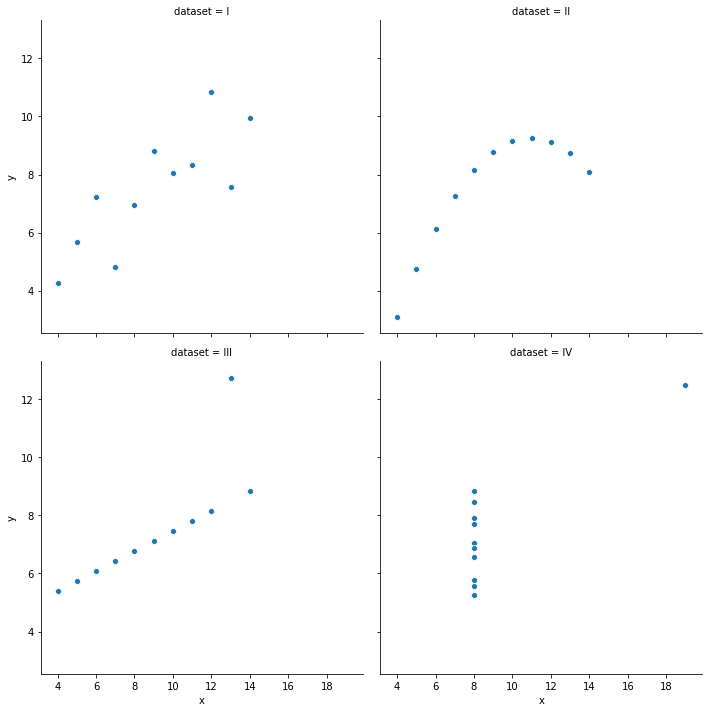

In [35]:
sns.relplot('x', 'y', col='dataset', data=df, col_wrap=2)

### Use Seaborn to make [linear model plots](http://seaborn.pydata.org/generated/seaborn.lmplot.html)

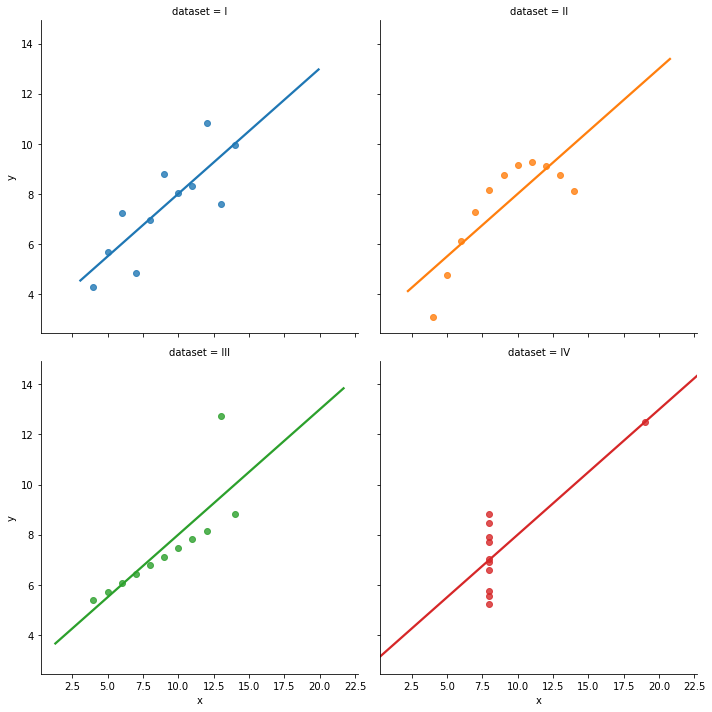

In [36]:
sns.lmplot('x', 'y', col='dataset', hue='dataset', data=df, col_wrap=2, ci=None)

#### Links
- [Seaborn examples: Anscombe's quartet](http://seaborn.pydata.org/examples/anscombes_quartet.html)
- [Wikipedia: Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)
- [The Datasaurus Dozen](https://www.autodeskresearch.com/publications/samestats)

## 2. Tips dataset

### Load dataset

In [37]:
tips = sns.load_dataset('tips')

### See the data's shape

In [38]:
tips.shape

(244, 7)

### See the first 5 rows

In [39]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Describe the data

In [40]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### Make univariate [distribution plots](https://seaborn.pydata.org/generated/seaborn.distplot.html)

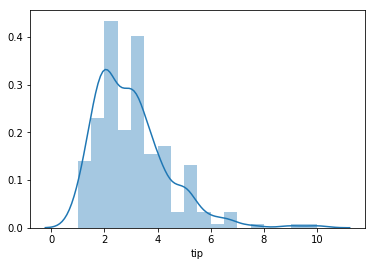

In [41]:
sns.distplot(tips.tip)

### Make bivariate [relational plots](https://seaborn.pydata.org/generated/seaborn.relplot.html)

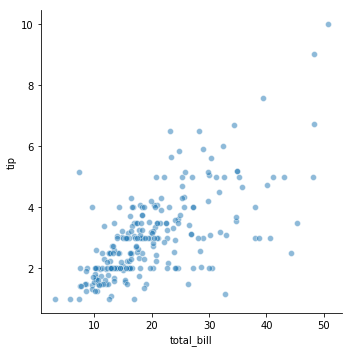

In [42]:
sns.relplot('total_bill', 'tip', data=tips, alpha=0.5)

### Make univariate [categorical plots](https://seaborn.pydata.org/generated/seaborn.catplot.html)

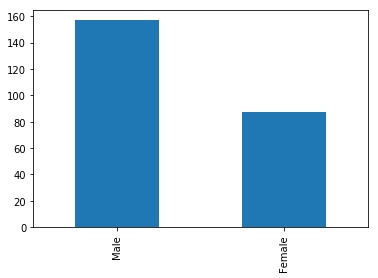

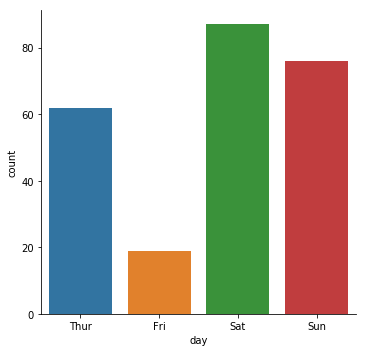

In [43]:
tips.sex.value_counts()
tips.sex.value_counts().plot.bar()
sns.catplot('day', data=tips, kind='count');

### Make bivariate [categorical plots](https://seaborn.pydata.org/generated/seaborn.catplot.html)

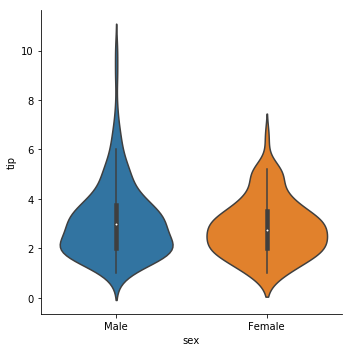

In [46]:
sns.catplot('sex', 'tip', data=tips, kind='violin', alpha=0.5);

## 3. Flights

### Load dataset

In [47]:
flights = sns.load_dataset('flights')

### See the data's shape

In [48]:
flights.shape

(144, 3)

### See the first 5 rows

In [49]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


### Describe the data

In [50]:
flights.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


### Plot year & passengers

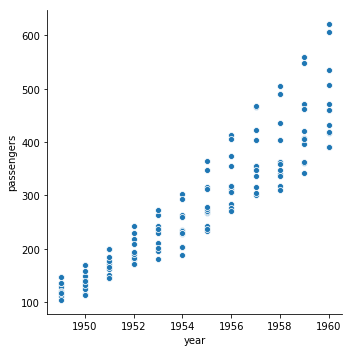

In [51]:
sns.relplot('year', 'passengers', data=flights);

### Plot month & passengers

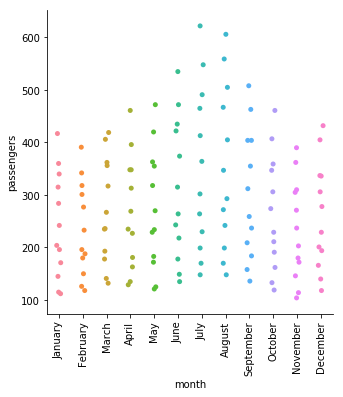

In [52]:
sns.catplot('month', 'passengers', data=flights);
plt.xticks(rotation=90);

### Create a [pivot table](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot_table.html) of passengers by month and year

In [53]:
table = flights.pivot_table('passengers', 'month', 'year')

table

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


### Plot the pivot table as a [heat map](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

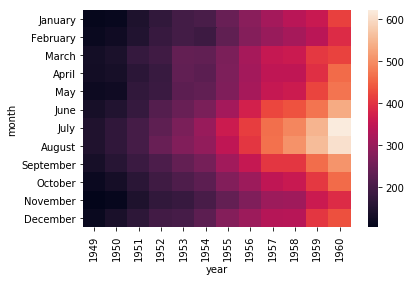

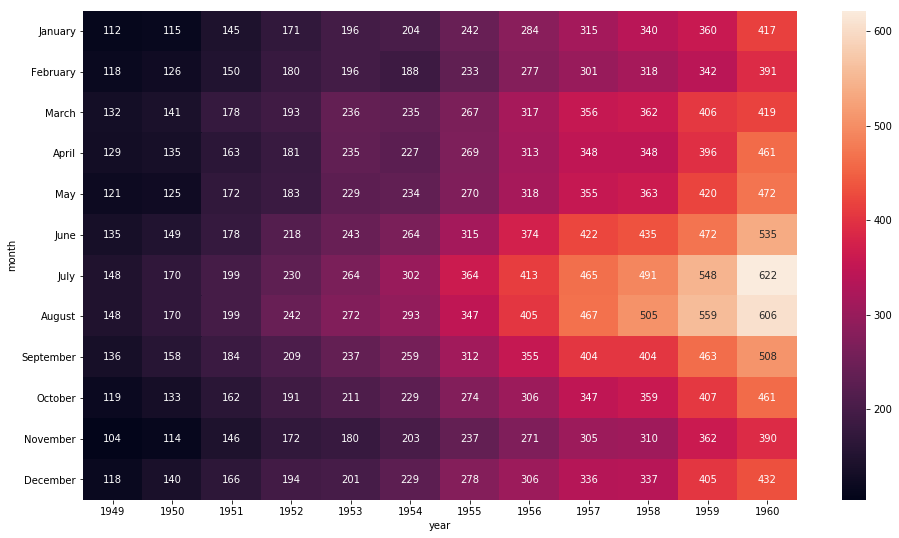

In [54]:
sns.heatmap(table);
plt.figure(figsize=(16, 9))
sns.heatmap(table, annot=True, fmt='d');

# ASSIGNMENT

### 1.

Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

### 2.

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

TypeError: object of type 'int' has no len()

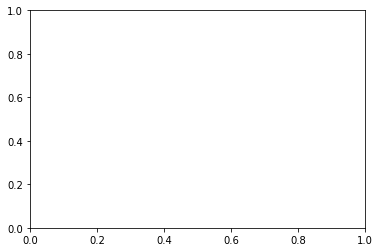

In [61]:
import geopandas as gpd
county_shape = '../../../Documents/School/Lambda School/Datasets/Census/cb_2017_us_county_5m.shp'
data = gpd.read_file(county_shape)
plt.axis(-180,-50,0,90)

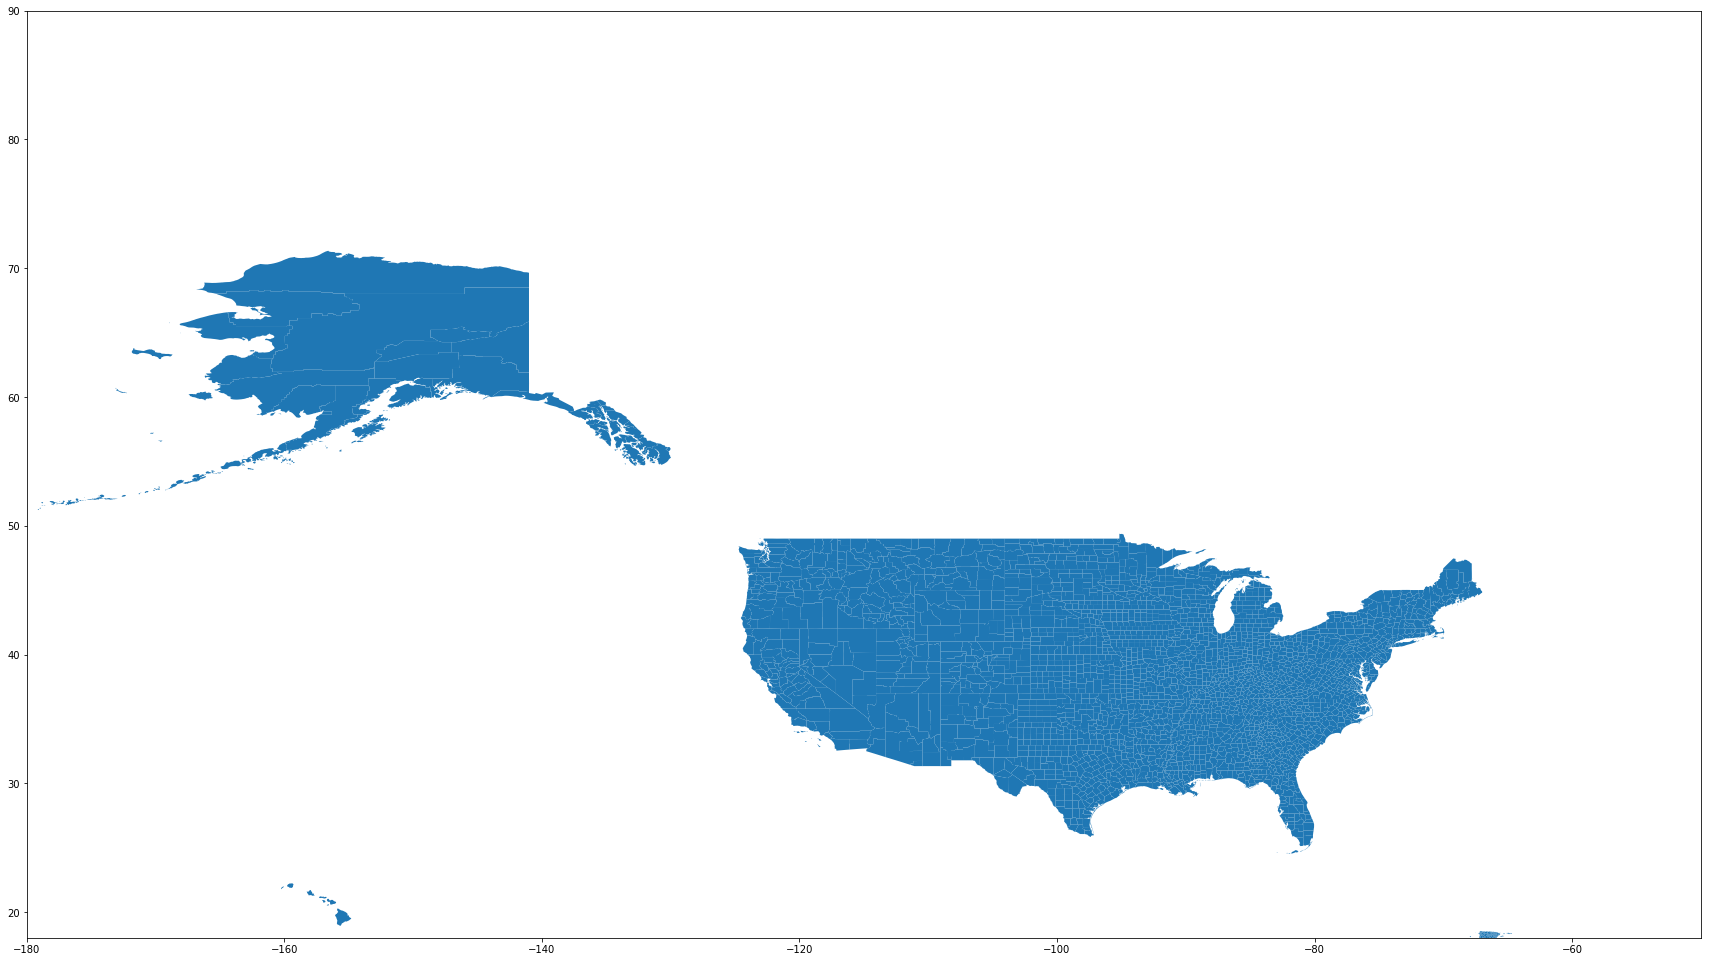

In [64]:
fig, ax = plt.subplots(figsize = (30,30))
ax.set_xlim([-180,-50])
ax.set_ylim([18,90])
data.plot(figsize=(30,30), ax=ax)

In [194]:
data.head(10)

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,04,015,00025445,0500000US04015,04015,Mohave,06,34475503964,387344307,"POLYGON ((-114.755618 36.087166, -114.753638 3..."
1,22,105,00559500,0500000US22105,22105,Tangipahoa,15,2049488093,136678798,"POLYGON ((-90.567171 30.824806, -90.567195 30...."
2,16,063,00395624,0500000US16063,16063,Lincoln,06,3111451190,11606076,"POLYGON ((-114.594605 43.198345, -114.374962 4..."
3,27,119,00659505,0500000US27119,27119,Polk,06,5105067510,69169913,"POLYGON ((-97.146672 48.171484, -97.1457019134..."
4,38,017,01034226,0500000US38017,38017,Cass,06,4571107601,7732062,"POLYGON ((-97.706034 47.239978, -97.4515119999..."
5,46,081,01266996,0500000US46081,46081,Lawrence,06,2072127374,667509,"POLYGON ((-104.055892 44.543341, -104.05587666..."
6,36,095,00974145,0500000US36095,36095,Schoharie,06,1610503572,11676949,"POLYGON ((-74.672428 42.564455, -74.6306309999..."
7,02,275,02516402,0500000US02275,02275,Wrangell,03,6619614514,2384746838,"(POLYGON ((-132.489883 56.503438, -132.476335 ..."
8,13,143,00350637,0500000US13143,13143,Haralson,06,730804590,2616530,POLYGON ((-85.38651002496731 33.90171855900009...
9,13,023,00347451,0500000US13023,13023,Bleckley,06,559100209,8447343,"POLYGON ((-83.48413599999999 32.405767, -83.48..."


In [199]:
census_data = pd.read_csv('../../../Documents/School/Lambda School/Datasets/Census/DEC_00_SF1_GCTPH1.US05PR_with_ann.csv', encoding='cp437', skiprows=1)

In [201]:
print(census_data.columns)
print(census_data.head(5))

Index(['Id', 'Id2', 'Geography', 'Target Geo Id', 'Target Geo Id2',
       'Geographical Area', 'Geographical Area.1', 'Population',
       'Housing  units', 'Area in square miles - Total area',
       'Area in square miles - Water area', 'Area in square miles - Land area',
       'Density per square mile of land area - Population',
       'Density per square mile of land area - Housing  units'],
      dtype='object')
          Id  Id2      Geography   Target Geo Id  Target Geo Id2  \
0  0100000US  NaN  United States       0100000US             NaN   
1  0100000US  NaN  United States     0400000US01             1.0   
2  0100000US  NaN  United States  0500000US01001          1001.0   
3  0100000US  NaN  United States  0500000US01003          1003.0   
4  0100000US  NaN  United States  0500000US01005          1005.0   

                          Geographical Area Geographical Area.1  Population  \
0                             United States       United States   281421906   
1          

In [173]:
counties_pulled_out = census_reduced.loc[census_reduced['GCT_STUB.display-label.1'].str[-1] == 'y']

In [178]:
counties_pulled_out = counties_pulled_out.rename(columns={'GCT_STUB.display-label.1': 'County'})

In [180]:
counties_pulled_out['County'] = counties_pulled_out['County'].str[:-7]

In [202]:
merged = data.merge(census_data, left_on='AFFGEOID', right_on='Target Geo Id', how = 'inner')
merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 3212 entries, 0 to 3211
Data columns (total 24 columns):
STATEFP                                                  3212 non-null object
COUNTYFP                                                 3212 non-null object
COUNTYNS                                                 3212 non-null object
AFFGEOID                                                 3212 non-null object
GEOID                                                    3212 non-null object
NAME                                                     3212 non-null object
LSAD                                                     3212 non-null object
ALAND                                                    3212 non-null int64
AWATER                                                   3212 non-null int64
geometry                                                 3212 non-null object
Id                                                       3212 non-null object
Id2                          

In [212]:
merged['Population'].describe()

count    3.212000e+03
mean     8.878710e+04
std      2.893977e+05
min      6.700000e+01
25%      1.148650e+04
50%      2.534150e+04
75%      6.153500e+04
max      9.519338e+06
Name: Population, dtype: float64

In [224]:
merged['PopHou'] = merged['Population'] / merged['Housing  units']

In [228]:
merged['PopHou'].describe()

count    3212.000000
mean        2.270783
std         0.353249
min         0.568440
25%         2.104646
50%         2.301869
75%         2.472619
max         4.487937
Name: PopHou, dtype: float64

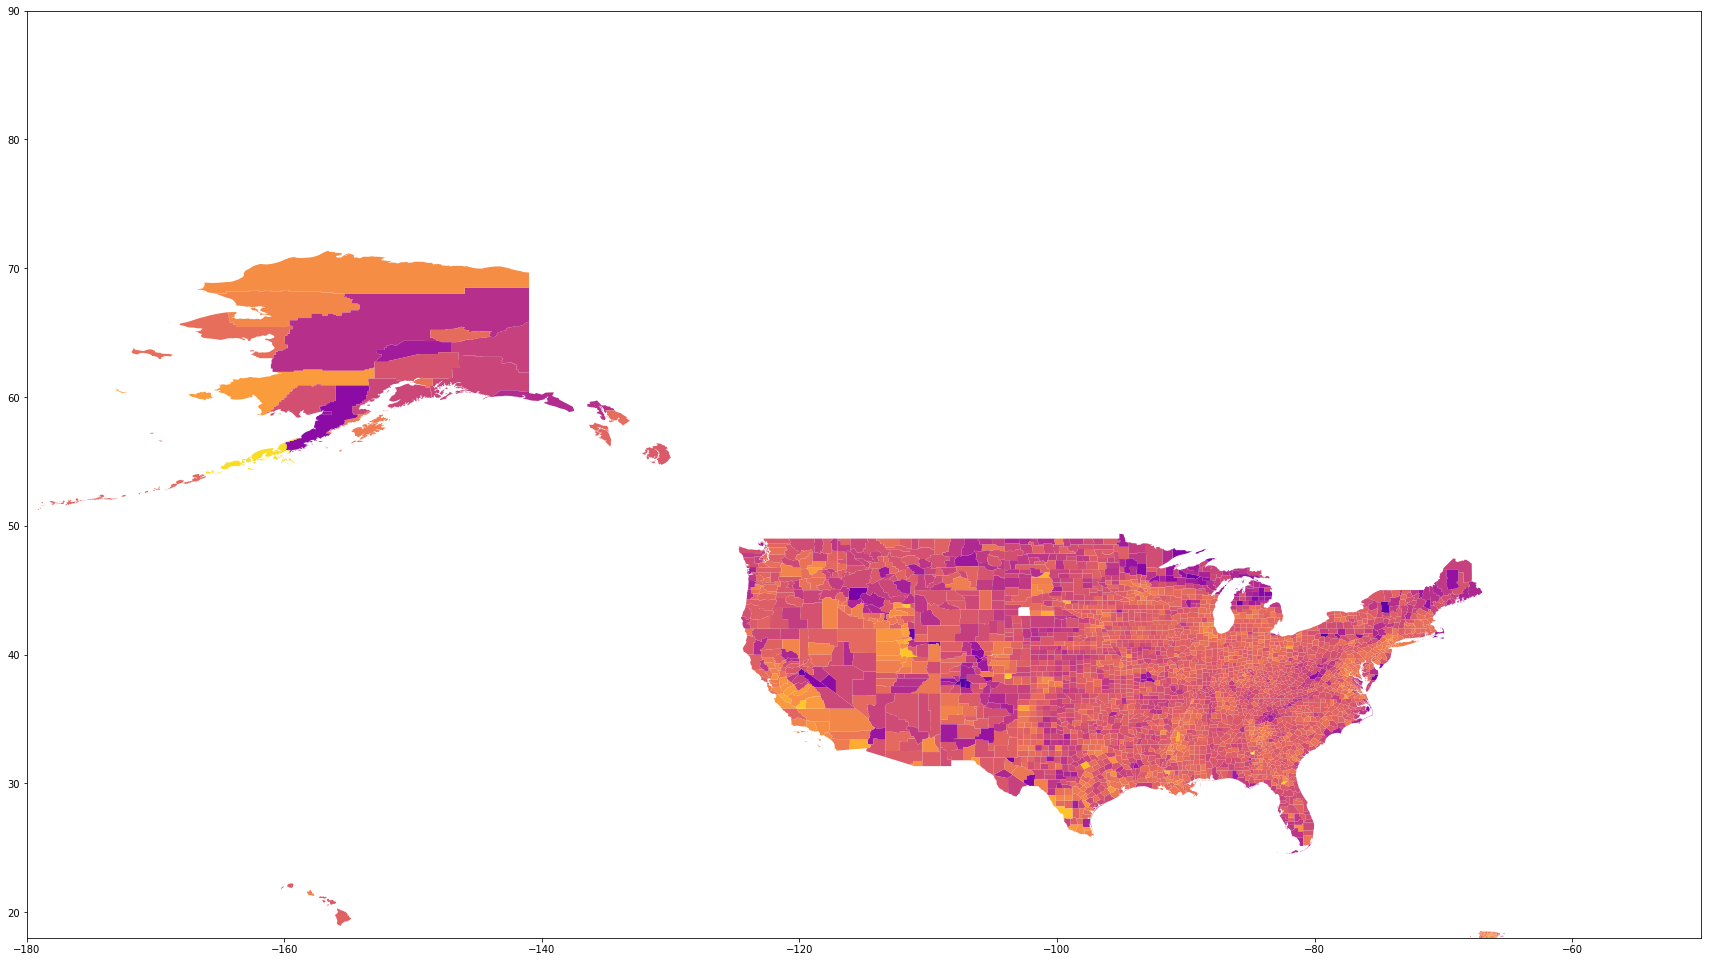

In [230]:
fig, ax = plt.subplots(figsize = (30,30))
ax.set_xlim([-180,-50])
ax.set_ylim([18,90])
merged.plot(column = 'PopHou', figsize=(30,30), ax=ax, cmap='plasma', vmin = 0, vmax = 4)